<h1 style="font-size: 1.6rem; font-weight: bold">ITO 5047: Fundamentals of Artificial Intelligence</h1>
<h1 style="font-size: 1.6rem; font-weight: bold">Artificial Neural Networks</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>
References: Information Source from Monash Faculty of Information Technology

---

### **Perceptron**

McCulloch and Pitts proposed a simplified artificial neuron called the **perceptron**, modeled after biological neurons in the human brain. Biological neurons receive electrical signals from other neurons through branch-like structures called **dendrites** and transmit signals through a long projection called the **axon**. At connection points called **synapses**, signal strength is modulated, effectively adjusting the connection strength between neurons. When the cumulative input signal exceeds a threshold, the neuron "fires" by sending an electrical impulse.

A **perceptron** mimics this biological process by computing a weighted sum of inputs and applying an **activation function** to determine whether it should activate. This creates a decision boundary that separates different classes of input patterns. Perceptrons are kind of **Feed-forward** networks represent a fundamental class of neural architectures. These networks enforce a unidirectional information flow, with data propagating exclusively from input nodes toward output nodes without any backward connections.

**Core Components:**
- **Input vector** $\mathbf{a}$: Represents incoming signals (analogous to dendrite inputs)
- **Weight vector** $\mathbf{w}$: Determines connection strength for each input (synaptic weights)
- **Activation function** $g$: Controls neuron firing behavior (threshold mechanism)

$a_j = g(in_j) = g(\mathbf{w}_j \cdot \mathbf{a}) = g(\sum_{i=0}^{n} w_{i,j} a_i)$

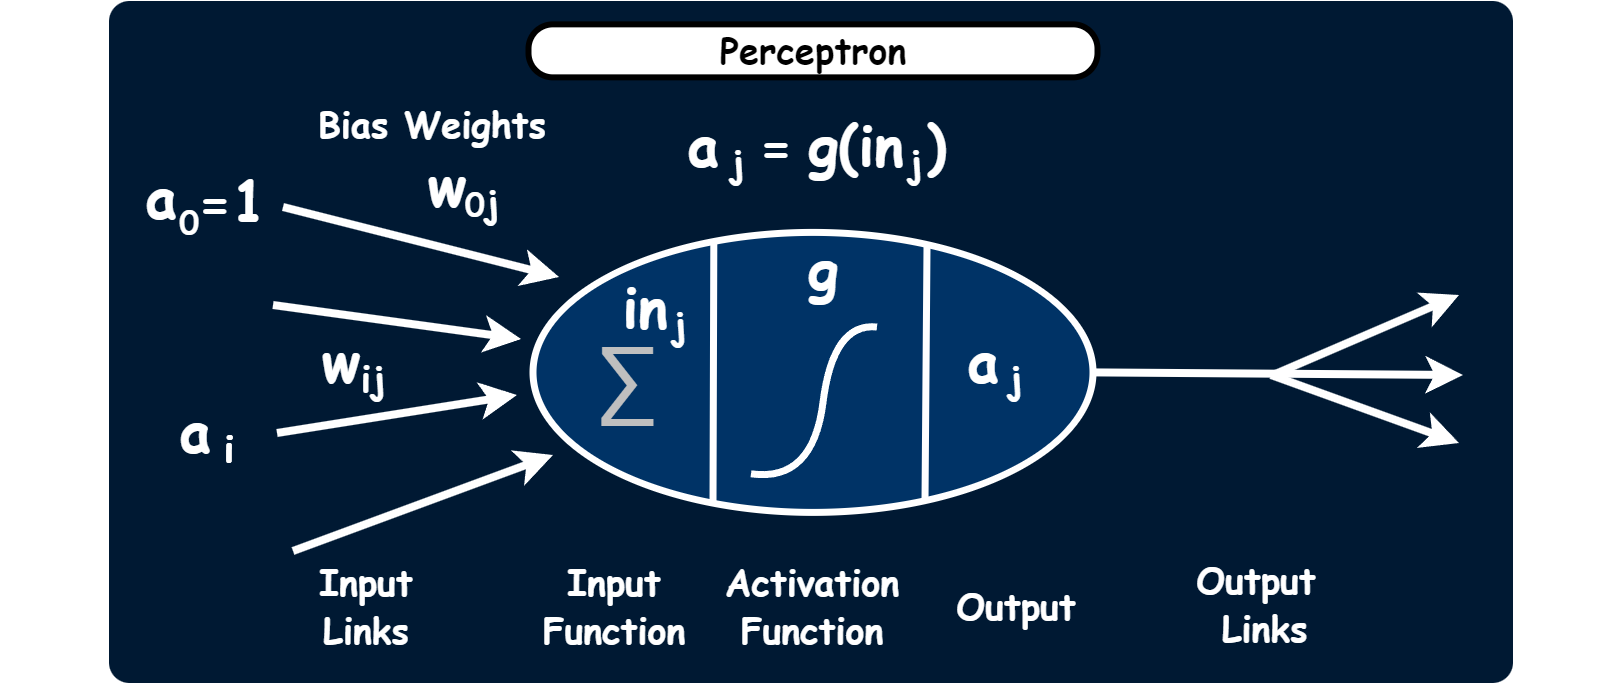

**Input Links ($a_0, a_i$):** These represent the input signals feeding into the perceptron. Notice that $a_0 = 1$ serves as the **bias input**, providing a constant offset that allows the decision boundary to shift away from the origin.

**Weights ($w_{0j}, w_{ij}$):** Each connection carries a weight that amplifies or diminishes the corresponding input signal. The **bias weight** $w_{0j}$ connects to the constant input $a_0 = 1$.

**Input Function ($in_j$ with $\Sigma$):** This component computes the weighted sum of all inputs: $in_j = \sum_{i=0}^{n} w_{i,j} a_i$, combining all incoming signals into a single value.

**Activation Function ($g$):** Applied to the weighted sum, this function determines the neuron's output. Common choices include step functions, sigmoid functions, or ReLU functions.

**Output ($a_j$):** The final result after applying the activation function, representing whether the neuron fires and with what intensity.

**Output Links:** The neuron's output can serve as input to subsequent layers in a neural network, creating complex computational architectures.

---

### **Activation Functions**
A Perceptron uses the an activation function, either a step function or a sigmoid function to determine if it should activate.

**Step Function (Traditional Perceptron):**
Produces binary outputs (0 or 1), mimicking the "fire/don't fire" behavior of biological neurons. Ideal for binary classification tasks but lacks differentiability for gradient-based learning.
$$g(x) = \begin{cases} 
1 & \text{if } x \geq 0 \\
0 & \text{otherwise}
\end{cases}$$

**Sigmoid Function (Smooth Alternative):**
Provides smooth, continuous outputs between 0 and 1, enabling gradient-based optimization algorithms. The sigmoid's differentiable nature makes it suitable for backpropagation training in more complex networks.

$$g(x) = \frac{1}{1 + e^{-x}}$$

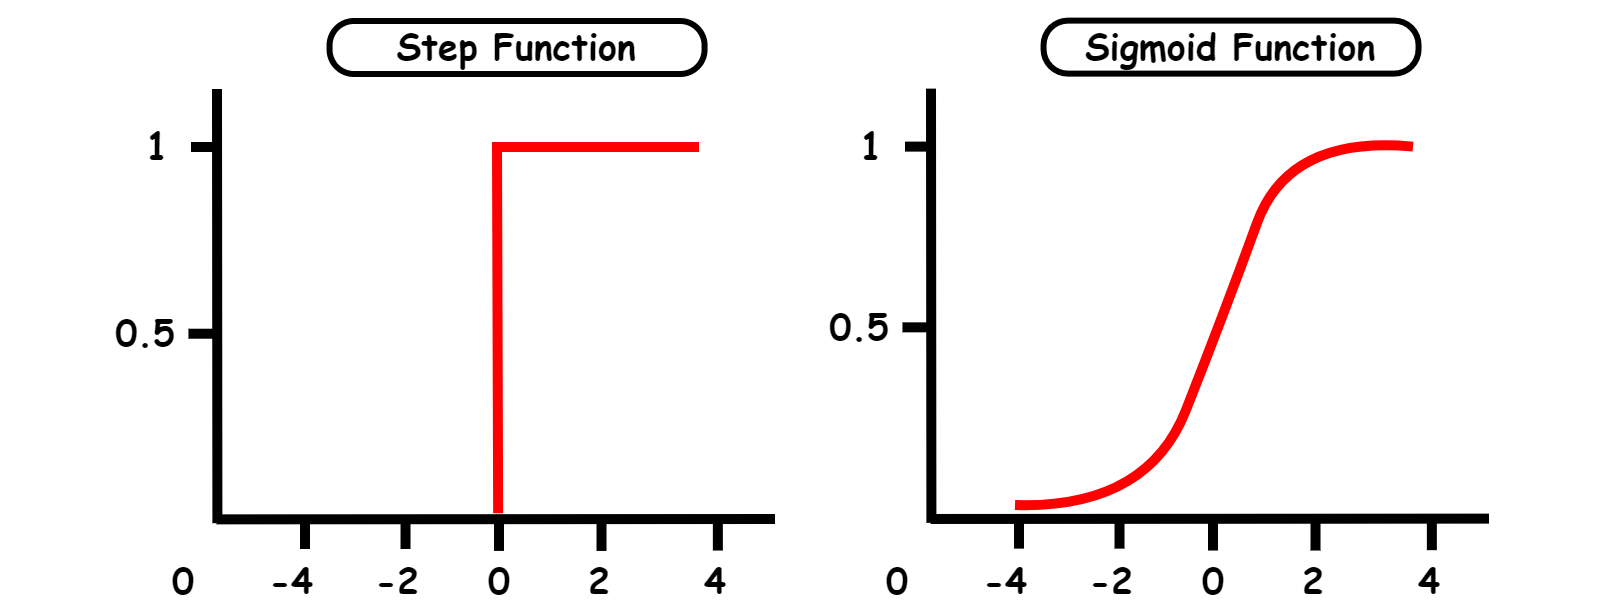

<br>

### **Single-Layer Feed-Forward Neural Networks**

Perceptrons are kind of **Feed-forward** networks represent a fundamental class of neural architectures. These networks enforce a unidirectional information flow, with data propagating exclusively from input nodes toward output nodes without any backward connections.

**Each neuron's activation depends solely on its immediate input signals**, creating a deterministic mapping from inputs to outputs. These **networks can accommodate multiple output** configurations to handle diverse computational tasks - from simple binary decision-making systems to complex multi-class recognition problems that categorize inputs into numerous distinct categories.

A single-layer feed-forward neural network consists of multiple perceptrons operating in parallel, where each perceptron produces a distinct output. This architecture enables the network to handle **multi-class classification** or **multiple regression outputs** simultaneously.

**Key Characteristics:**
- All inputs connect directly to all outputs
- Each output node represents an independent perceptron
- No hidden layers between input and output
- Information flows unidirectionally from inputs to outputs

For a network with $n$ inputs and $m$ outputs, each output $a_j$ is computed independently:

$$a_3 = w_{1,3}a_1 + w_{2,3}a_2$$
$$a_4 = w_{1,4}a_1 + w_{2,4}a_2$$

Where each weight $w_{i,j}$ affects only one specific output, creating $m$ separate training processes.

<br>

### **Example: Movie Review Classifier**

In this example, a perceptron is used to classify movie reviews as positive or negative sentiment. We take a dataset of movie reviews with each labeled as positive or negative. We want to learn to predict sentiment to classify future reviews.

**Input:** movie review text.
**Output:** POSITIVE/NEGATIVE.

Get a large collection of sample movie reviews, each labeled "POSITIVE" or "NEGATIVE".
**Goal:** learn to predict sentiment labels for new, future reviews.
**Features:** words in the review text.

The first review here is POSITIVE, but these other two are NEGATIVE.

*"This movie was absolutely fantastic! The cinematography was breathtaking and the acting was superb. I would definitely recommend this film to anyone looking for great entertainment."* ✓

*"Terrible waste of time and money. The plot made no sense and the dialogue was cringe-worthy throughout the entire film."* ✗

*"Boring and predictable storyline. I fell asleep halfway through and didn't miss anything important when I woke up."* ✗

The features for each review would be the count of specific words in the review text. We might have four features:

- **BIAS** (always has value 1)
- **fantastic** (# occurrences of "fantastic")
- **terrible** (# occurrences of "terrible") 
- **great** (# occurrences of "great")

If we have a review with the text "fantastic great movie," we can see the associated vector and the weighted sum of a perceptron with the weights specified in the **w** vector.

**x** = "fantastic great movie"

$f(x) = (BIAS : 1, fantastic : 1, terrible : 0, great : 1)$

$w = (BIAS : -2, fantastic : 3, terrible : -4, great : 2)$

We define the output of our perceptron as being one to mean the review is POSITIVE and 0 to mean NEGATIVE.

**Define g(w · f(x)) = 1 ⟹ x is POSITIVE and g(w · f(x)) = 0 ⟹ x is NEGATIVE**

Passing the result through the step activation function would give a result of 1, implying that the review is positive:

$$w · f(x) = Σ wᵢ × f(x)ᵢ = 1 × -2 + 1 × 3 + 1 × 2 + 0 × -4 = 3$$

$$g(3) = 1$$

---

### **Decision Rules in Neural Networks**

**Binary Classification Rule**

In binary classification tasks, one class label receives the value 1 while the other gets 0. The perceptron's weight vector forms a **hyperplane** within the feature space, serving as the classification boundary. Data points positioned on one side of this hyperplane receive one label, while points on the opposite side get the other label.

$g(x) = \begin{cases} 
1 & \text{if } w \cdot f(x) > 0 \\
0 & \text{otherwise}
\end{cases}$

**Multi-class Classification Rule** 

For problems involving multiple categories, each class maintains its own distinct weight vector. Given an input **x**, we compute the dot product between the input and each weight vector:

$g_w(x, c) = \sum w_{i,c} f(x)_i$

To classify **x**, we select the class **c** that produces the maximum value:

$c^* = \arg\max_c g_w(x, c)$

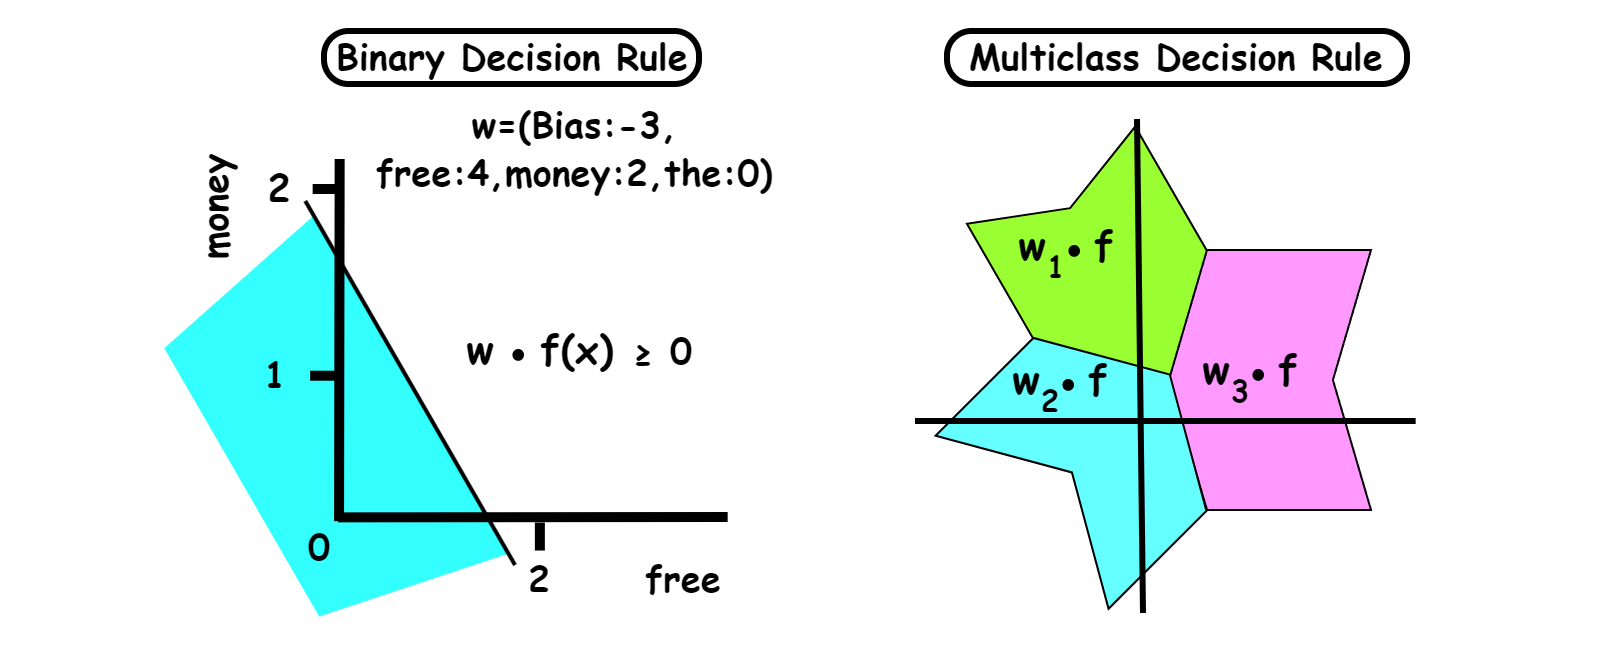

<br>

### **Example: Music Genre Classification**

For example, suppose we wanted to identify this song description as being about **rock**, **jazz**, or **electronic** music.

**x** = "heavy guitar solo"

We might again have four features based on word counts. We have three weight vectors and an input vector.

$$f(x) = (BIAS = 1, heavy = 1, guitar = 1, beat = 0, bass = 1)$$

$$w_{ROCK} = (BIAS = -1, heavy = 3, guitar = 4, beat = 1, bass = 2)$$

$$w_{JAZZ} = (BIAS = 2, heavy = 0, guitar = 2, beat = 3, bass = 1)$$

$$w_{ELECTRONIC} = (BIAS = 1, heavy = 1, guitar = 0, beat = 4, bass = 3)$$

**Rock** has the highest weighted sum and is therefore assigned as the class.

$$g_w(f(x), ROCK) = 1 \times -1 + 1 \times 3 + 1 \times 4 + 0 \times 1 + 1 \times 2 = 8$$

$$g_w(f(x), JAZZ) = 1 \times 2 + 1 \times 0 + 1 \times 2 + 0 \times 3 + 1 \times 1 = 5$$

$$g_w(f(x), ELECTRONIC) = 1 \times 1 + 1 \times 1 + 1 \times 0 + 0 \times 4 + 1 \times 3 = 5$$

$$c^* = ROCK$$

---

### **Learning Perceptrons**

Each of the weights in a perceptron affects only one output, enabling independent training processes for multi-output networks.

**Perceptron Learning Rule**

The fundamental learning rule adjusts weights based on prediction errors:

$$w_i \leftarrow w_i + \alpha(y - g_w(x))x_i$$

Where:
- $y$ represents the true class label for input $x$
- $g_w(x)$ represents the perceptron's prediction
- $α$ (alpha) is the learning rate constant controlling update magnitude

The weight adjustment follows this pattern:

| Condition | **x_i > 0** | **x_i < 0** |
|-----------|-------------|-------------|
| **y = 1, g_w(x) = 0** | w_i increased | w_i decreased |
| **y = 0, g_w(x) = 1** | w_i decreased | w_i increased |

Weights are shifted only when the predicted label doesn't match the actual label, pushing the prediction toward the correct classification.

**Gradient Descent Rule for Sigmoid Perceptron**

When using sigmoid activation, the update rule becomes more sophisticated:

$$w_i \leftarrow w_i + \alpha(y - g_w(x)) \times g_w(x) \times (1 - g_w(x)) \times x_i$$

This incorporates the sigmoid derivative, maintaining the same fundamental principle of adjusting weights to minimize prediction errors.

---

### **Expressiveness of Perceptrons**

Perceptrons can only learn **linearly separable functions** such as AND, OR, NOT, and majority operations. They cannot master more complex **non-linear functions** like the logical XOR operation.

**Linear Separability Constraint**

The perceptron's decision boundary is always a hyperplane, restricting it to problems where classes can be separated by a straight line (in 2D) or hyperplane (in higher dimensions). This fundamental limitation prevents learning of functions requiring curved or more complex decision boundaries.

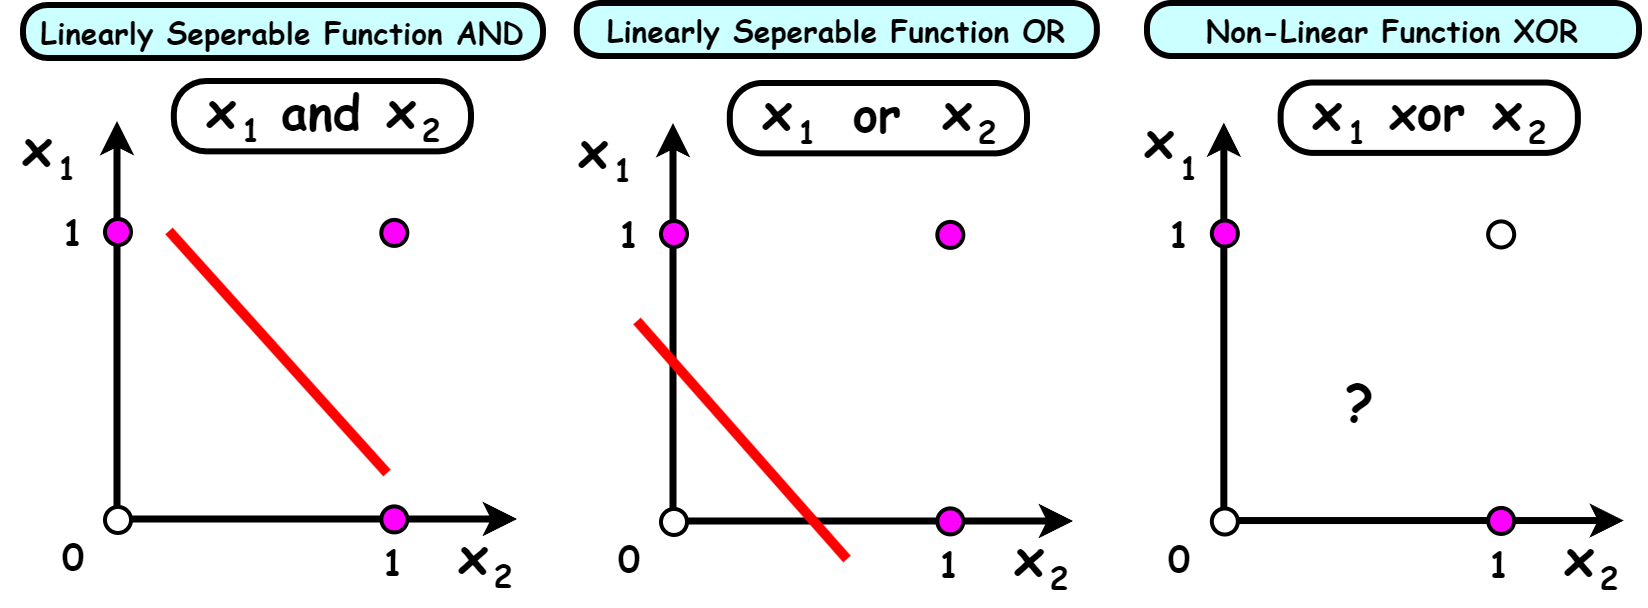

<br>

### **Data Separability and Convergence**

**Separable Data**
When training data is linearly separable, the perceptron learning algorithm is **guaranteed to converge** to a solution that correctly classifies all training examples. The algorithm will find appropriate weights within a finite number of iterations.

**Non-Separable Data**
If the training data cannot be linearly separated, the learning process **will never converge**. Weights will continue to adjust indefinitely as the algorithm attempts unsuccessfully to find a perfect linear separator.

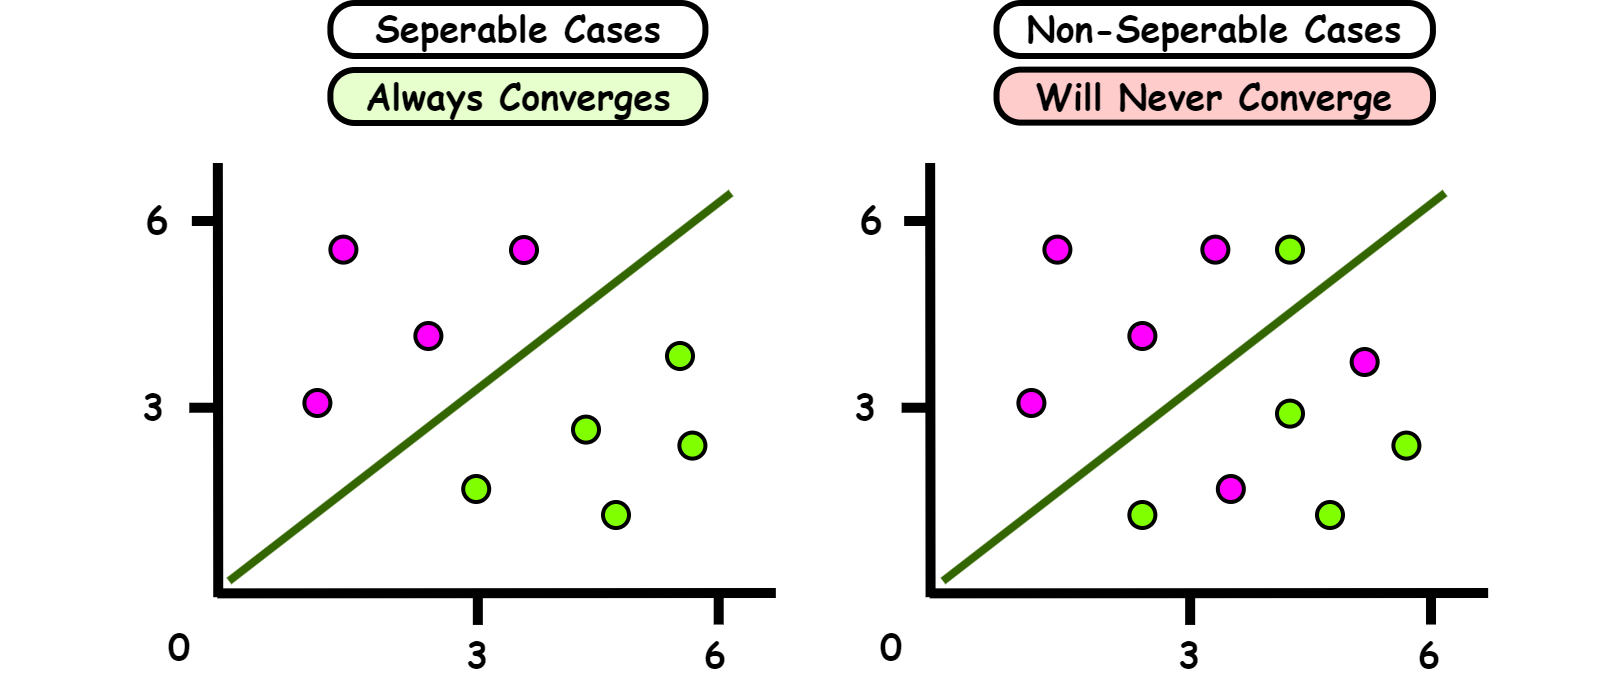

<br>

### **Common Issues with Perceptrons**

**Overfitting Susceptibility**
Like many machine learning algorithms, perceptrons are vulnerable to overfitting, where the model memorizes training data rather than learning generalizable patterns. This leads to poor performance on unseen data.

**Weight Instability with Non-Separable Data**
When trained on non-separable datasets, weights may oscillate wildly during training as the algorithm repeatedly attempts corrections without finding a stable solution.

**Marginal Solutions**
Even when successful, perceptrons may find solutions that barely separate the training data. These minimal-margin solutions often fail to generalize well to new examples, as they lack robustness to small variations in input data.

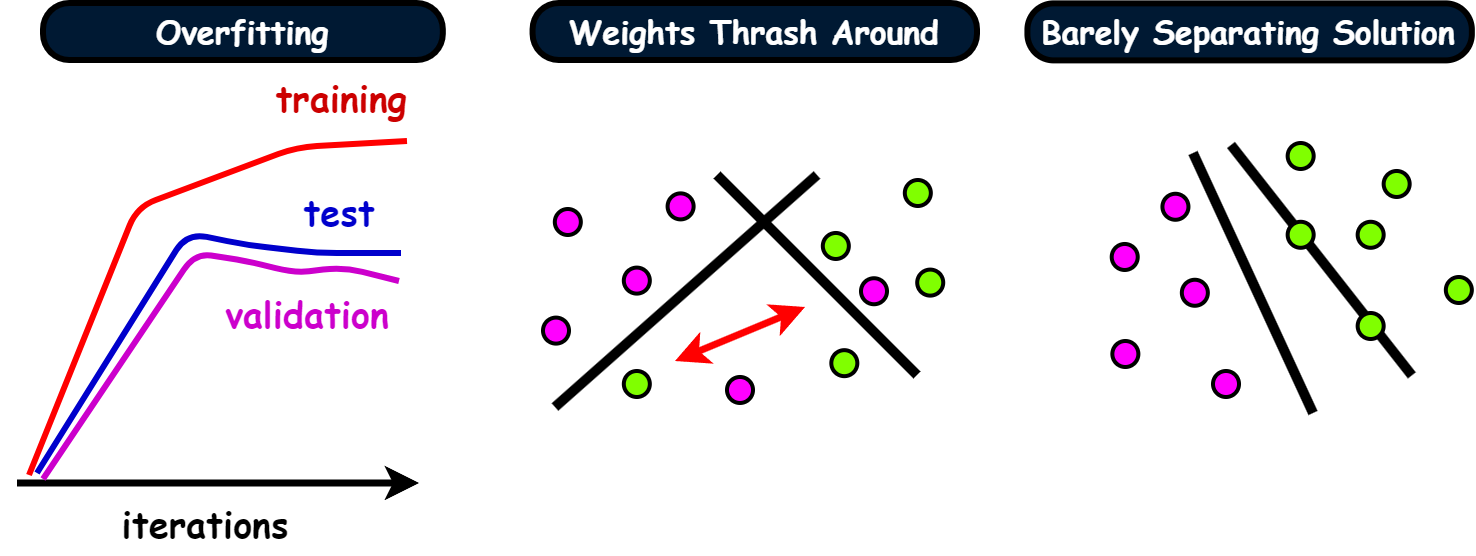

---

### **Worked Example 1**

**Step 1: Consider** your solution to the following example problem.


The following image is a diagram of a simple perceptron. The image represents a perceptron. It consists of four inputs and a summation node leading to an output. From left to right:

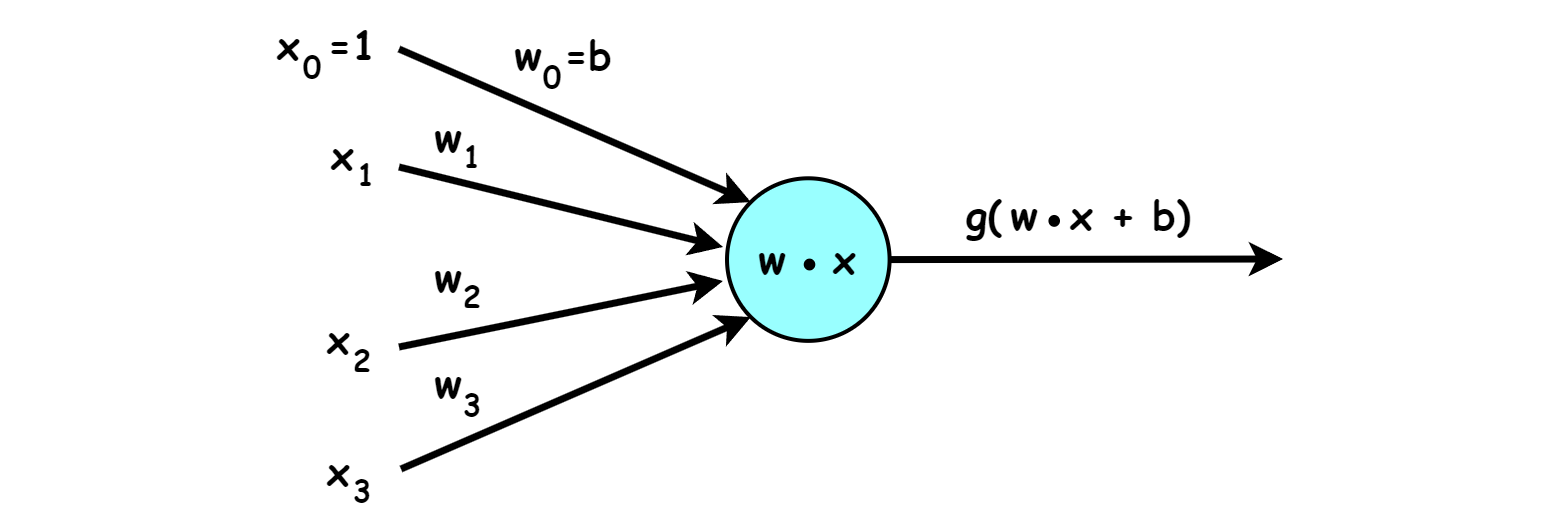

* Four inputs are labelled as x0, x1, x2, and x3. Each input is associated with a weight, w0, w1, w2, and w3 respectively.
* x0 is set to 1, representing the bias input, and its weight w0 is set to b, representing the bias.
* The inputs are fed into a summation node represented by a circle with the expression w · x inside it.
* The output of the summation node is represented as g(w · x + b), where g denotes an activation function applied to the weighted sum of inputs plus the bias.
* An arrow points from the summation node to the output, indicating the flow of the computation.

There are three inputs, x₁, x₂, x₃ and the constant input x₀ = 1 for the bias term. Suppose each x₁, x₂, x₃ can take only binary values {0, 1} and that the activation function g is the step function.

$g(x) = \begin{cases} 
1 & \text{if } x > 0 \\
0 & \text{otherwise}
\end{cases}$

If the weights of the perceptron are currently **w = (w₀ = -2, w₁ = 1, w₂ = -3, w₃ = 4)**, and we have the following data with associated class labels.

| x₁ | x₂ | x₃ | class |
|----|----|----|-------|
| 1  | 0  | 1  | 1     |
| 1  | 0  | 0  | 1     |
| 1  | 1  | 0  | 1     |
| 1  | 0  | 1  | 0     |

**1. Show the perceptron's output for these four inputs and how the perceptron would classify each. Assume corresponds to class 1, and therefore corresponds to class 0. What is the accuracy of our perceptron on this data set?**

Given weights: **w = (w₀ = 2, w₁ = 1, w₂ = -3, w₃ = 4)**

| x₀ | x₁ | x₂ | x₃ | C | w·x | g(w·x) |
|----|----|----|----|----|-----|---------|
| 1  | 1  | 0  | 1  | 1  | 7   | 1       |
| 1  | 1  | 0  | 0  | 1  | 3   | 1       |
| 1  | 1  | 1  | 0  | 1  | 0   | 0       |
| 1  | 1  | 0  | 1  | 0  | 7   | 1       |

For each input, we calculate: **w · x = w₀(1) + w₁x₁ + w₂x₂ + w₃x₃**

**Sample 1:** x₁ = [1, 0, 1, 1], True class = 1
$$w \cdot x_1 = (2)(1) + (1)(0) + (-3)(1) + (4)(1) = 2 + 0 - 3 + 4 = 3$$
**g(3) = 1 (since 3 ≥ 0), Predicted class: 1, True class: 1** 

**Sample 2:** x₂ = [1, 0, 0, 1], True class = 1
$$w \cdot x_2 = (2)(1) + (1)(0) + (-3)(0) + (4)(1) = 2 + 0 + 0 + 4 = 6$$
**g(6) = 1 (since 6 ≥ 0), Predicted class: 1, True class: 1** 

**Sample 3:** x₃ = [1, 1, 0, 1], True class = 0
$$w \cdot x_3 = (2)(1) + (1)(1) + (-3)(0) + (4)(1) = 2 + 1 + 0 + 4 = 7$$
**g(7) = 1 (since 7 ≥ 0), Predicted class: 1, True class: 0** 

**Sample 4:** x₄ = [1, 0, 1, 0], True class = 0
$$w \cdot x_4 = (2)(1) + (1)(0) + (-3)(1) + (4)(0) = 2 + 0 - 3 + 0 = -1$$
**g(-1) = 0 (since -1 < 0), Predicted class: 0, True class: 0** 

**Accuracy:** 3 correct out of 4 = **75%**

<br>

**2. Suppose we were instead training the perceptron, and the weights were updated after classifying each of the four inputs. Show how the weights are updated after the first incorrect classification by the perceptron. Use a learning rate α = 0.1.**

**Perceptron Learning Rule:** 
$$w_i^{new} = w_i^{old} + \alpha(y - \hat{y})x_i$$
$$w_i \leftarrow w_i + \alpha(w·x  - g(w·x))x_i$$

The first incorrect classification occurs at **Sample 3**.

From Sample 3:
- Given Input: $x₃ = [1, 1, 0, 1]$ (with bias term)
- True label: $y = w·x = 0$
- Predicted label: $ŷ = g(w·x) = 1$
- Error: $(y - ŷ) = (w·x  - g(w·x)) = 0 - 1 = -1$
- Learning rate: α = 0.1

**Weight Updates:**
$$w₀^{(2)} = w₀^{(1)} + \alpha(y - \hat{y})x₀ = 2 + 0.1(0 - 1)(1) = 2 + 0.1(-1)(1) = 2 - 0.1 = 1.9$$
$$w₁^{(2)} = w₁^{(1)} + \alpha(y - \hat{y})x₁ = 1 + 0.1(0 - 1)(1) = 1 + 0.1(-1)(1) = 1 - 0.1 = 0.9$$
$$w₂^{(2)} = w₂^{(1)} + \alpha(y - \hat{y})x₂ = -3 + 0.1(0 - 1)(0) = -3 + 0.1(-1)(0) = -3 + 0 = -3$$
$$w₃^{(2)} = w₃^{(1)} + \alpha(y - \hat{y})x₃ = 4 + 0.1(0 - 1)(1) = 4 + 0.1(-1)(1) = 4 - 0.1 = 3.9$$

**Updated Weight Vector:** **w^(2) = (1.9, 0.9, -3, 3.9)**

---

In [14]:
import numpy as np

class SimplePerceptron:
    def __init__(self, learning_rate=0.1):
        self.lr = learning_rate
        self.weights = None
    
    def step_function(self, x):
        return 1 if x >= 0 else 0
    
    def predict(self, x):
        x_with_bias = np.insert(x, 0, 1)
        weighted_sum = np.dot(self.weights, x_with_bias)
        return self.step_function(weighted_sum)
    
    def train_one_sample(self, x, true_label):
        x_with_bias = np.insert(x, 0, 1)
        weighted_sum = np.dot(self.weights, x_with_bias)
        predicted = self.step_function(weighted_sum)
        
        if predicted != true_label:
            error = true_label - predicted
            print(f"Wrong! Input: {x}, True: {true_label}, Predicted: {predicted}")
            print(f"Old weights: {self.weights}")
            self.weights += self.lr * error * x_with_bias
            print(f"New weights: {self.weights}")
        
        return predicted

# Correct data from document  
data = [
    ([0, 1, 1], 1),  # Sample 1: x₁=0, x₂=1, x₃=1
    ([0, 0, 1], 1),  # Sample 2: x₁=0, x₂=0, x₃=1
    ([1, 0, 1], 0),  # Sample 3: x₁=1, x₂=0, x₃=1
    ([0, 1, 0], 0)   # Sample 4: x₁=0, x₂=1, x₃=0 
]

# Question 1: Predictions
perceptron = SimplePerceptron(learning_rate=0.1)
perceptron.weights = np.array([2.0, 1.0, -3.0, 4.0])  # [w0, w1, w2, w3]

print("Question 1:")
correct = 0
for i, (x, true_class) in enumerate(data):
    x_with_bias = np.insert(x, 0, 1)
    weighted_sum = np.dot(perceptron.weights, x_with_bias)
    pred = perceptron.predict(x)
    
    if pred == true_class:
        correct += 1
        status = "Correct"
    else:
        status = "Wrong"
    
    print(f"Sample {i+1}: {x} -> w·x = {weighted_sum}, g(w·x) = {pred}, True: {true_class} {status}")

print(f"Accuracy: {correct}/{len(data)} = {correct/len(data)*100}%")

# Question 2: First weight update
print("\nQuestion 2:")
perceptron.weights = np.array([2.0, 1.0, -3.0, 4.0])
print(f"Starting weights: {perceptron.weights}")

for i, (x, true_class) in enumerate(data):
    pred = perceptron.train_one_sample(x, true_class)
    if pred != true_class:
        print(f"First wrong prediction at sample {i+1}")
        break
    else:
        print(f"Sample {i+1}: Correct prediction ({pred})")

Question 1:
Sample 1: [0, 1, 1] -> w·x = 3.0, g(w·x) = 1, True: 1 Correct
Sample 2: [0, 0, 1] -> w·x = 6.0, g(w·x) = 1, True: 1 Correct
Sample 3: [1, 0, 1] -> w·x = 7.0, g(w·x) = 1, True: 0 Wrong
Sample 4: [0, 1, 0] -> w·x = -1.0, g(w·x) = 0, True: 0 Correct
Accuracy: 3/4 = 75.0%

Question 2:
Starting weights: [ 2.  1. -3.  4.]
Sample 1: Correct prediction (1)
Sample 2: Correct prediction (1)
Wrong! Input: [1, 0, 1], True: 0, Predicted: 1
Old weights: [ 2.  1. -3.  4.]
New weights: [ 1.9  0.9 -3.   3.9]
First wrong prediction at sample 3


---